In [21]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the datasets
train_df = pd.read_csv('data/exoTrain.csv')
test_df = pd.read_csv('data/exoTest.csv')

In [13]:
# Step 1: Inspect the Data
print(f"Train Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape: {test_df.shape}")

# Display the first few rows
print(train_df.head())
print(test_df.head())

# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Train Dataset Shape: (5087, 3198)
Test Dataset Shape: (570, 3198)
   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX

LABEL
1    5050
2      37
Name: count, dtype: int64


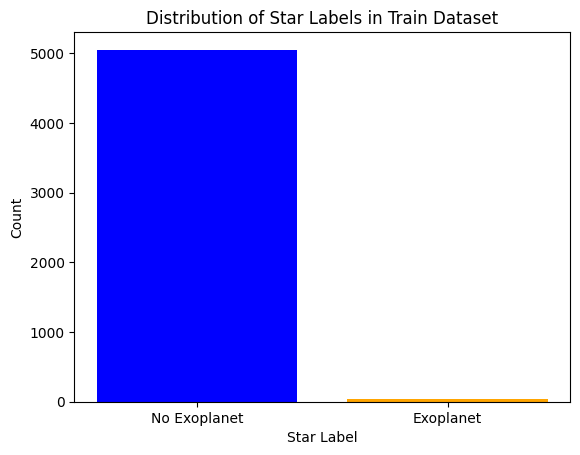

In [14]:
# Step 2: Understand the Data Distribution
# Count distribution of labels in the train dataset
label_counts = train_df['LABEL'].value_counts()
print(label_counts)

# Visualize the label distribution
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
plt.xticks([1, 2], ['No Exoplanet', 'Exoplanet'])
plt.xlabel('Star Label')
plt.ylabel('Count')
plt.title('Distribution of Star Labels in Train Dataset')
plt.show()

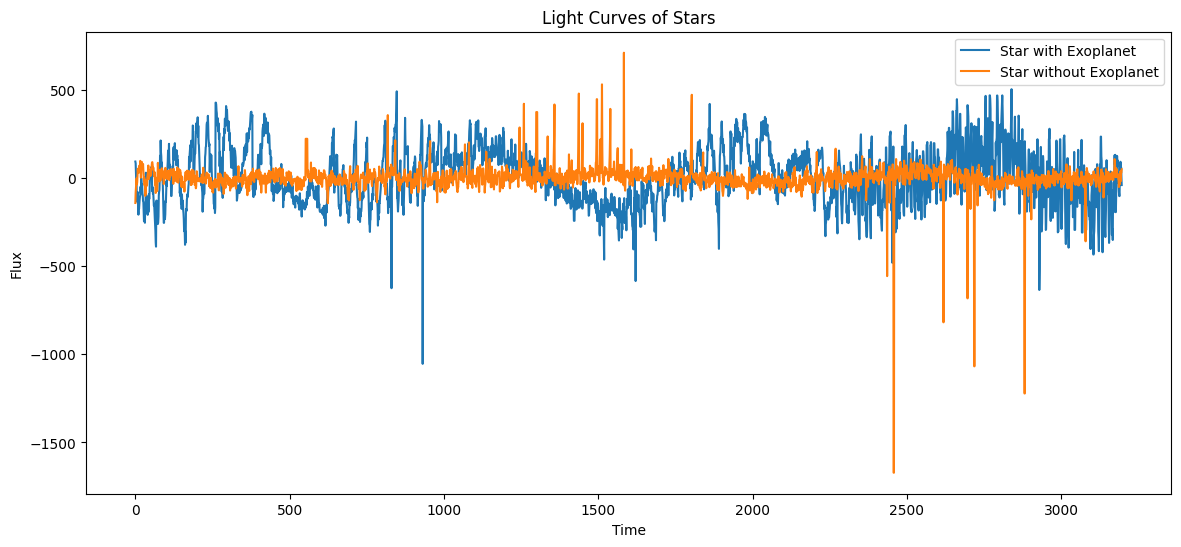

In [15]:
# Step 3: Visualize Light Curves
# Example: Visualize a star with and without an exoplanet
exoplanet_star = train_df[train_df['LABEL'] == 2].iloc[0, 1:]
non_exoplanet_star = train_df[train_df['LABEL'] == 1].iloc[0, 1:]

plt.figure(figsize=(14, 6))
plt.plot(exoplanet_star.values, label='Star with Exoplanet')
plt.plot(non_exoplanet_star.values, label='Star without Exoplanet')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Light Curves of Stars')
plt.legend()
plt.show()

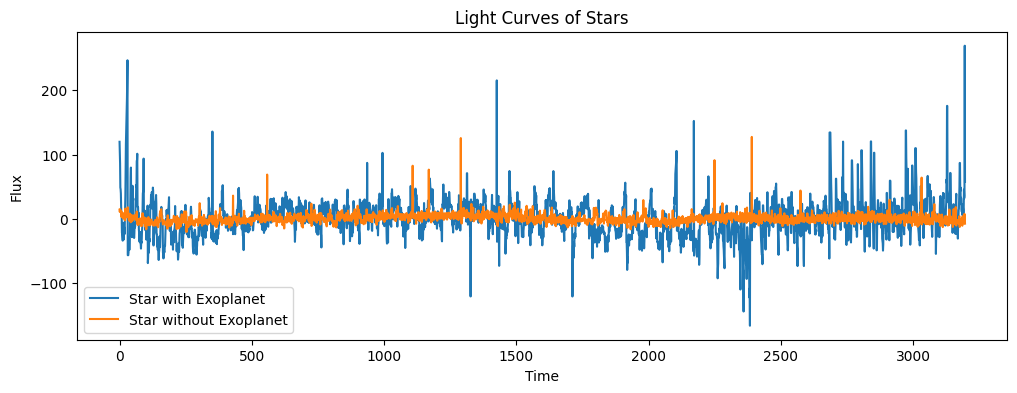

In [20]:
exoplanet_star = test_df[test_df['LABEL'] == 2].iloc[0, 1:]
non_exoplanet_star = test_df[test_df['LABEL'] == 1].iloc[0, 1:]

plt.figure(figsize=(12, 4))
plt.plot(exoplanet_star.values, label='Star with Exoplanet')
plt.plot(non_exoplanet_star.values, label='Star without Exoplanet')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Light Curves of Stars')
plt.legend()
plt.show()

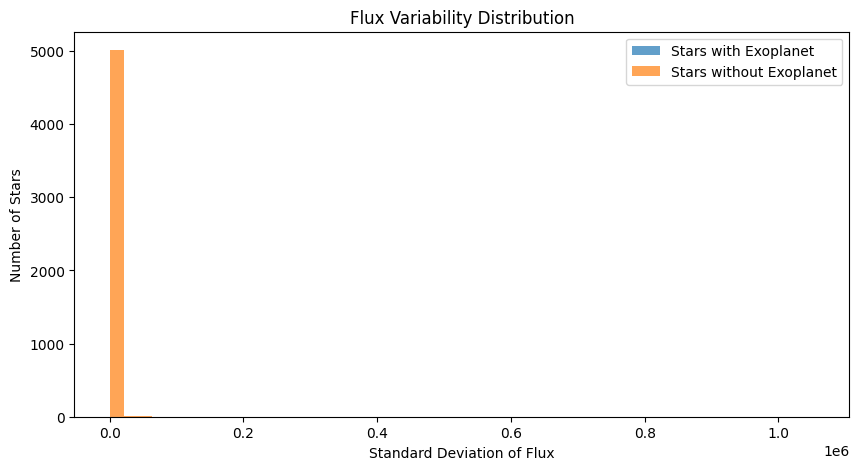

In [16]:
# Step 4: Investigate Flux Variability
# Calculate standard deviation of flux for each star
train_df['Flux_StdDev'] = train_df.iloc[:, 1:].std(axis=1)

# Plot histogram of flux variability
plt.figure(figsize=(10, 5))
plt.hist(train_df[train_df['LABEL'] == 2]['Flux_StdDev'], bins=50, alpha=0.7, label='Stars with Exoplanet')
plt.hist(train_df[train_df['LABEL'] == 1]['Flux_StdDev'], bins=50, alpha=0.7, label='Stars without Exoplanet')
plt.xlabel('Standard Deviation of Flux')
plt.ylabel('Number of Stars')
plt.title('Flux Variability Distribution')
plt.legend()
plt.show()

In [17]:
# Step 5: Save Preprocessed Data (Optional)
# Save the processed datasets
train_df.to_csv('data/exoTrain_processed.csv', index=False)
test_df.to_csv('data/exoTest_processed.csv', index=False)